# **Logistic regression**

In [ ]:
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
# Load the penguins dataset
df = sns.load_dataset("penguins")
df.dropna(inplace=True)
# Filter rows for 'Adelie' and 'Chinstrap' classes
selected_classes = ['Adelie', 'Chinstrap']
df_filtered = df[df['species'].isin(selected_classes)].copy() # Make a copy to avoid the warning
# Initialize the LabelEncoder
le = LabelEncoder()
# Encode the species column
y_encoded = le.fit_transform(df_filtered['species'])
df_filtered['class_encoded'] = y_encoded
# Display the filtered and encoded DataFrame
print(df_filtered[['species', 'class_encoded']])
# Split the data into features (X) and target variable (y)
y = df_filtered['class_encoded'] # Target variable
X = df_filtered.drop(['species', 'island', 'sex','class_encoded'], axis=1)

       species  class_encoded
0       Adelie              0
1       Adelie              0
2       Adelie              0
4       Adelie              0
5       Adelie              0
..         ...            ...
215  Chinstrap              1
216  Chinstrap              1
217  Chinstrap              1
218  Chinstrap              1
219  Chinstrap              1

[214 rows x 2 columns]


In [ ]:
#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=42)
logreg = LogisticRegression(solver='saga')
logreg.fit(X_train, y_train)
# Predict on the testing data
y_pred = logreg.predict(X_test)
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(logreg.coef_, logreg.intercept_)

Accuracy: 0.5813953488372093
[[ 2.75900436e-03 -8.19075797e-05  4.75398972e-04 -2.87200304e-04]] [-8.44910537e-06]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [ ]:
#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=42)
logreg = LogisticRegression(solver='liblinear')
logreg.fit(X_train, y_train)
# Predict on the testing data
y_pred = logreg.predict(X_test)
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(logreg.coef_, logreg.intercept_)

Accuracy: 1.0
[[ 1.45422752 -0.93943994 -0.16571368 -0.00398663]] [-0.04793176]


In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Apply StandardScaler to scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train the logistic regression model using 'liblinear' solver
logreg = LogisticRegression(solver='liblinear')
logreg.fit(X_train, y_train)

# Predict on the testing data
y_pred = logreg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy with liblinear solver and feature scaling:", accuracy)
print("Coefficients:", logreg.coef_)
print("Intercept:", logreg.intercept_)

Accuracy with liblinear solver and feature scaling: 0.9767441860465116
Coefficients: [[ 3.84019948 -0.76794126  0.18337305 -0.71426409]]
Intercept: [-1.58640217]


In [ ]:
# Apply StandardScaler to scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train the logistic regression model using 'liblinear' solver
logreg = LogisticRegression(solver='saga')
logreg.fit(X_train, y_train)

# Predict on the testing data
y_pred = logreg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy with saga solver and feature scaling:", accuracy)
print("Coefficients:", logreg.coef_)
print("Intercept:", logreg.intercept_)

Accuracy with saga solver and feature scaling: 0.9767441860465116
Coefficients: [[ 3.94085552 -0.82726516  0.1956019  -0.73529065]]
Intercept: [-1.80138724]


In [ ]:
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
# Load the penguins dataset
df = sns.load_dataset("penguins")
df.dropna(inplace=True)
# Filter rows for 'Adelie' and 'Chinstrap' classes
selected_classes = ['Adelie', 'Chinstrap']
df_filtered = df[df['species'].isin(selected_classes)].copy() # Make a copy to avoid the warning
# Initialize the LabelEncoder
le = LabelEncoder()
# Encode the species column
y_encoded = le.fit_transform(df_filtered['species'])
df_filtered['class_encoded'] = y_encoded
df_filtered.head()
X = df_filtered.drop(['species', 'class_encoded'], axis=1)
y = df_filtered['class_encoded'] # Target variable
X.head()
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size=0.2, random_state=42)
logreg = LogisticRegression(solver='saga')
logreg.fit(X_train, y_train)
# Predict on the testing data
y_pred = logreg.predict(X_test)
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(logreg.coef_, logreg.intercept_)

ValueError: could not convert string to float: 'Dream'

# **Logistic regression on real world data**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset from URL
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']

# Load dataset with specified column names
df = pd.read_csv(url, header=None, names=columns, na_values="?")

# Drop rows with missing values
df.dropna(inplace=True)

# Check the first few rows of the dataset
df.head()

# Compute correlation matrix for 5 features
selected_features = ['age', 'trestbps', 'chol', 'thalach', 'target']
corr_matrix = df[selected_features].corr()

# Display the correlation matrix
print(corr_matrix)


               age  trestbps      chol   thalach    target
age       1.000000  0.290476  0.202644 -0.394563  0.222156
trestbps  0.290476  1.000000  0.131536 -0.049108  0.159620
chol      0.202644  0.131536  1.000000 -0.000075  0.066448
thalach  -0.394563 -0.049108 -0.000075  1.000000 -0.420639
target    0.222156  0.159620  0.066448 -0.420639  1.000000


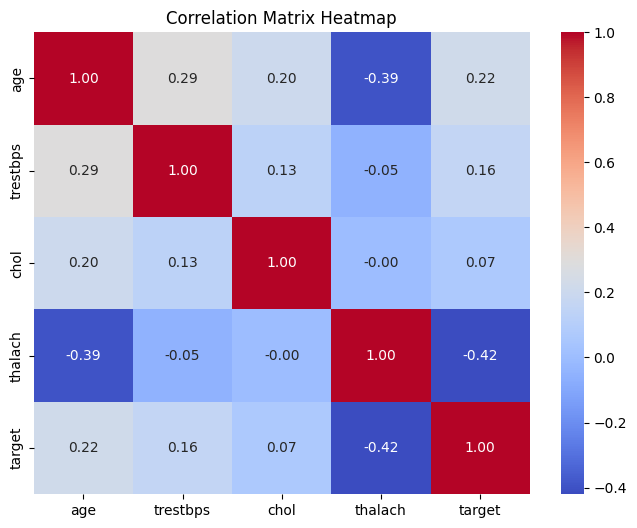

In [2]:
# Generate heatmap for correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

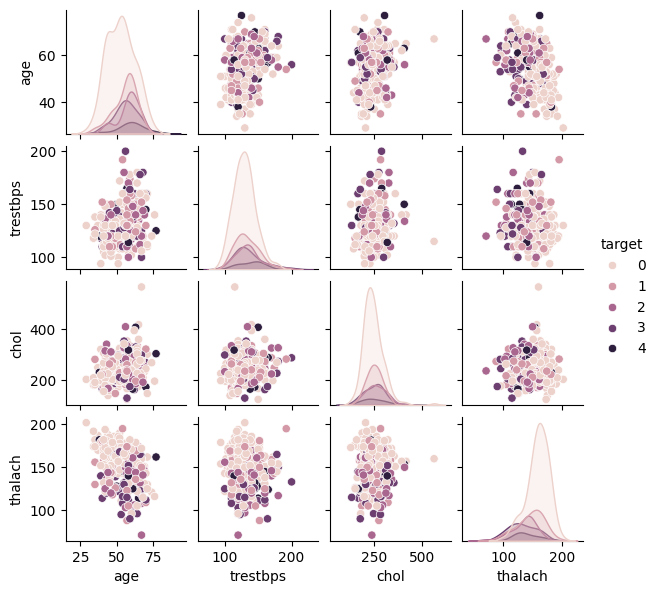

In [4]:
# Generate pair plot with reduced size
sns.pairplot(df[selected_features], diag_kind='kde', hue='target', height=1.5)

# Show the plot
plt.show()


In [7]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Features and target
X = df[['age', 'trestbps', 'chol', 'thalach']]  # Select your features
y = df['target']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Reshape y_train for compatibility
y_train = np.array(y_train).ravel()

# Initialize and fit the logistic regression model
model = LogisticRegression(solver='saga', max_iter=1000)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate model's performance
test_accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", test_accuracy)


Test Accuracy: 0.6


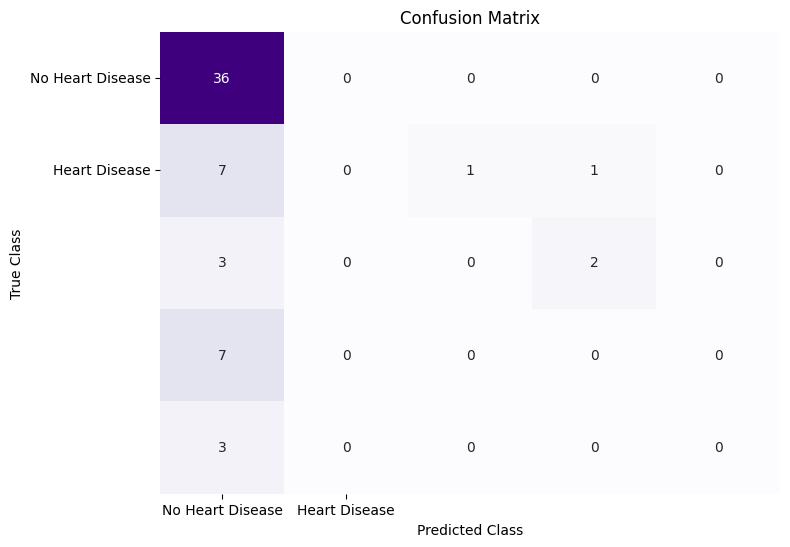

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Create a heatmap for the confusion matrix with a different color palette
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Purples', cbar=False,
            xticklabels=['No Heart Disease', 'Heart Disease'],
            yticklabels=['No Heart Disease', 'Heart Disease'])

plt.title('Confusion Matrix')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()


In [17]:
import statsmodels.api as sm
import numpy as np

# Ensure y is binary (0 and 1)
# Assuming 'target' can take values 0 or 1, convert it to binary if necessary
y_binary = np.where(y > 0, 1, 0)  # Convert to binary if y is not already binary

# Add a constant to the model (intercept)
X_const = sm.add_constant(X_scaled)  # X_scaled is the standardized features

# Fit the logistic regression model
logit_model = sm.Logit(y_binary, X_const)
result = logit_model.fit()

# Print the summary to get p-values
print(result.summary())


Optimization terminated successfully.
         Current function value: 0.579183
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  297
Model:                          Logit   Df Residuals:                      292
Method:                           MLE   Df Model:                            4
Date:                Tue, 01 Oct 2024   Pseudo R-squ.:                  0.1608
Time:                        20:42:04   Log-Likelihood:                -172.02
converged:                       True   LL-Null:                       -204.97
Covariance Type:            nonrobust   LLR p-value:                 1.653e-13
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1658      0.131     -1.267      0.205      -0.422       0.091
x1             0.0485      0.

Iteration 1/20, Cost: 11.288120958154115
Iteration 2/20, Cost: 7.241452232138243
Iteration 3/20, Cost: 4.664935372234975
Iteration 4/20, Cost: 3.023611878767115
Iteration 5/20, Cost: 1.977225841791167
Iteration 6/20, Cost: 1.309358222554906
Iteration 7/20, Cost: 0.8823541684892301
Iteration 8/20, Cost: 0.6086554522773047
Iteration 9/20, Cost: 0.4325670501408308
Iteration 10/20, Cost: 0.3186601384039827
Iteration 11/20, Cost: 0.2443960467744949
Iteration 12/20, Cost: 0.19543486415102598
Iteration 13/20, Cost: 0.16265156255212493
Iteration 14/20, Cost: 0.14023815309209234
Iteration 15/20, Cost: 0.1244965906639257
Iteration 16/20, Cost: 0.11307101554224874
Iteration 17/20, Cost: 0.1044594266333957
Iteration 18/20, Cost: 0.09770308191896604
Iteration 19/20, Cost: 0.0921889390626319
Iteration 20/20, Cost: 0.0875239933145527


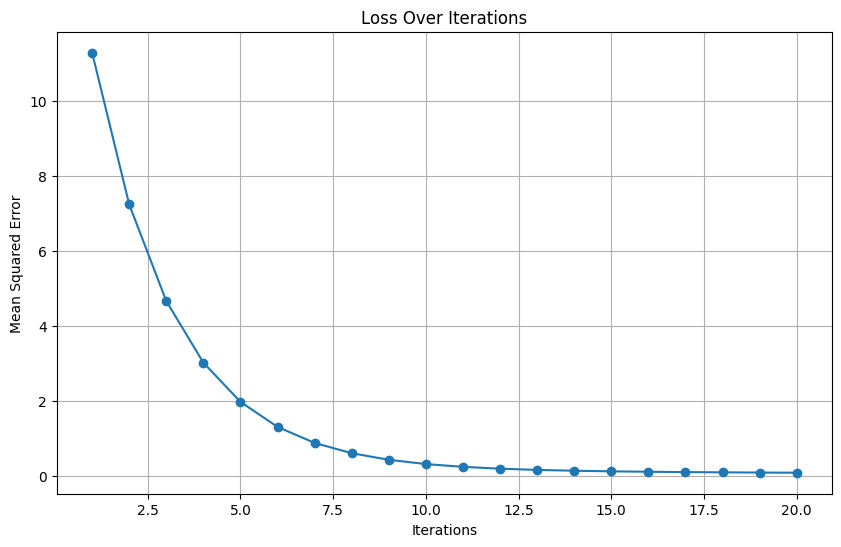

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Generate synthetic data
np.random.seed(0)
centers = [[-5, 0], [5, 1.5]]
X, y = make_blobs(n_samples=2000, centers=centers, random_state=5)

# Apply transformation to the data
transformation = [[0.5, 0.5], [-0.5, 1.5]]
X = np.dot(X, transformation)

# Add bias term to the feature set
X = np.c_[np.ones(X.shape[0]), X]  # Add a column of ones for the intercept

# Initialize weights randomly
weights = np.random.rand(X.shape[1])

# Set hyperparameters
learning_rate = 0.01
iterations = 20

# Initialize a list to store the loss values
loss_history = []

# Batch Gradient Descent
for i in range(iterations):
    predictions = X.dot(weights)  # Calculate predictions
    error = predictions - y  # Calculate error
    gradient = X.T.dot(error) / X.shape[0]  # Compute gradient
    weights -= learning_rate * gradient  # Update weights
    cost = (error ** 2).mean()  # Calculate mean squared error
    loss_history.append(cost)  # Store the loss value
    print(f"Iteration {i + 1}/{iterations}, Cost: {cost}")

# Plotting the loss over iterations
plt.figure(figsize=(10, 6))
plt.plot(range(1, iterations + 1), loss_history, marker='o')
plt.title('Loss Over Iterations')
plt.xlabel('Iterations')
plt.ylabel('Mean Squared Error')
plt.grid()
plt.show()


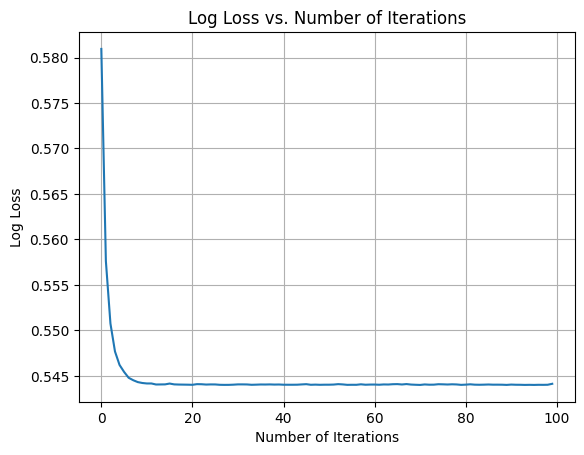

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import log_loss

# Load the Heart Disease dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
columns = ["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg",
           "thalach", "exang", "oldpeak", "slope", "ca", "thal", "target"]

df = pd.read_csv(url, header=None, names=columns)

# Replace missing values (represented by '?') with NaN and convert to numeric
df.replace('?', float('nan'), inplace=True)
df = df.apply(pd.to_numeric)

# Drop rows with missing values
df = df.dropna()

# Binary classification: Target column where 0 = no heart disease, 1 = heart disease
df['target'] = df['target'].apply(lambda x: 1 if x > 0 else 0)

# Select features and target variable
X = df[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']]
y = df['target']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (important for gradient-based algorithms)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create a logistic regression model using stochastic gradient descent (SGD)
model = SGDClassifier(loss='log_loss', max_iter=1, learning_rate='constant', eta0=0.01, warm_start=True)

# Train the model and track the loss
n_iterations = 100
losses = []

for epoch in range(n_iterations):
    model.partial_fit(X_train, y_train, classes=np.unique(y_train))
    # Predict probabilities for the training set
    y_pred_proba = model.predict_proba(X_train)
    # Calculate the log loss (binary cross-entropy)
    loss = log_loss(y_train, y_pred_proba)
    losses.append(loss)

# Plot the loss with respect to number of iterations
plt.plot(range(n_iterations), losses)
plt.xlabel('Number of Iterations')
plt.ylabel('Log Loss')
plt.title('Log Loss vs. Number of Iterations')
plt.grid(True)
plt.show()


Test Set Log Loss: 0.5007406850864419


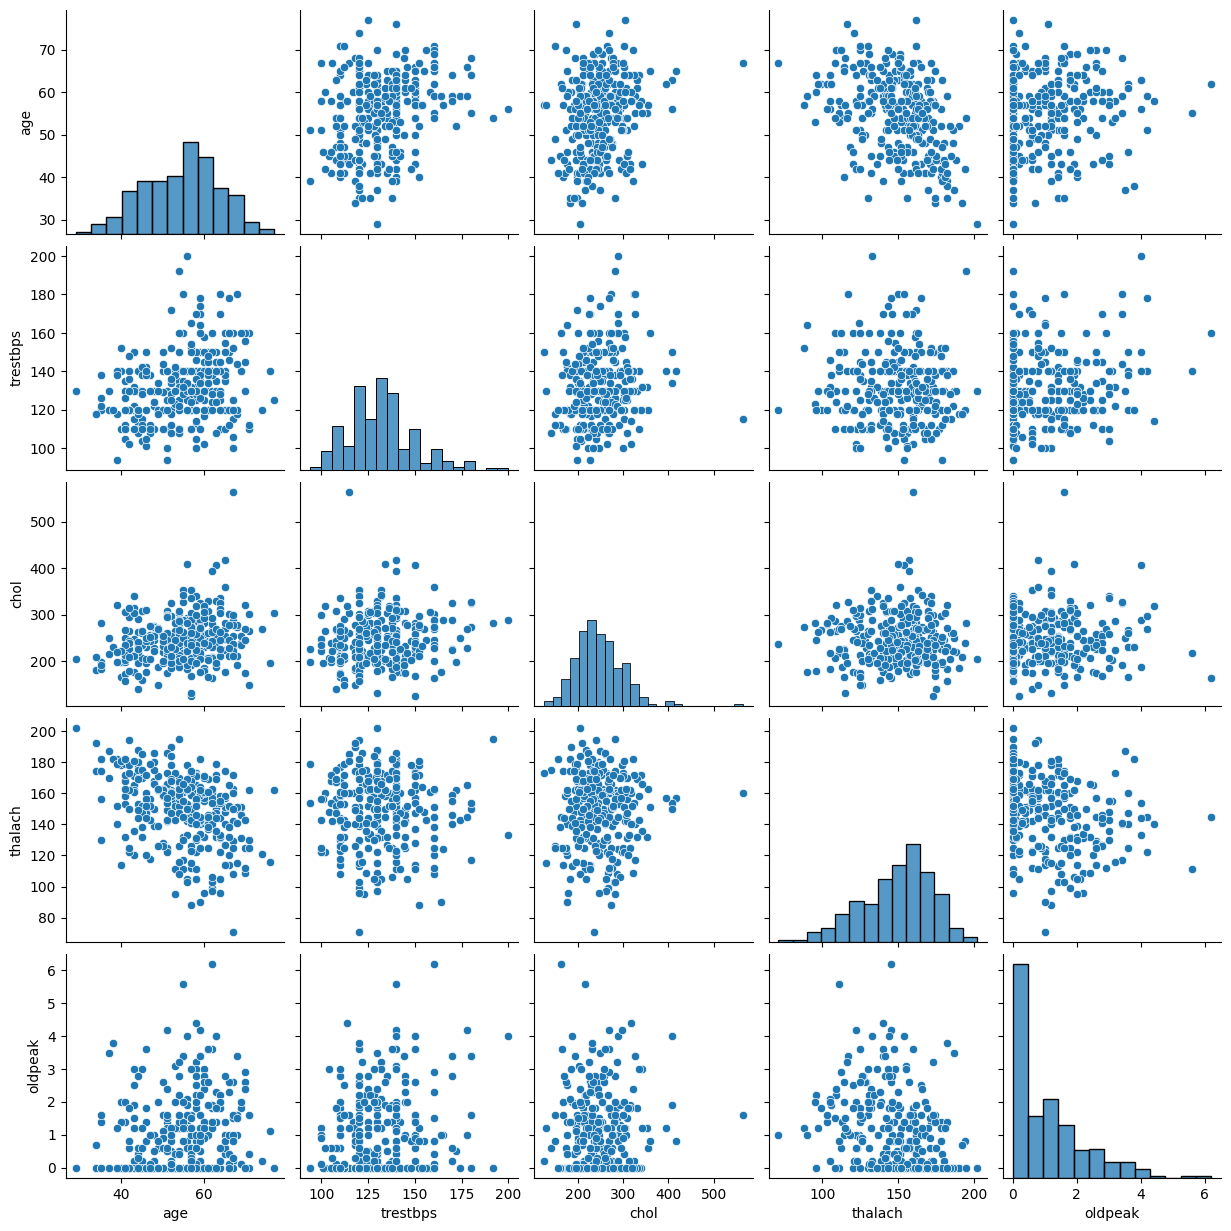

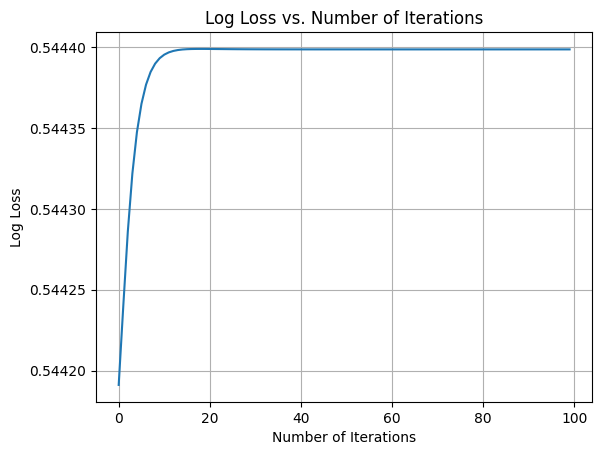

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import log_loss

# Load the Heart Disease dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
columns = ["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg",
           "thalach", "exang", "oldpeak", "slope", "ca", "thal", "target"]

df = pd.read_csv(url, header=None, names=columns)

# Replace missing values (represented by '?') with NaN and convert to numeric
df.replace('?', float('nan'), inplace=True)
df = df.apply(pd.to_numeric)

# Drop rows with missing values
df = df.dropna()

# Select 5 features for analysis
selected_features = df[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']]

# Binary classification: Target column where 0 = no heart disease, 1 = heart disease
df['target'] = df['target'].apply(lambda x: 1 if x > 0 else 0)

# Split the data into features (X) and target (y)
X = selected_features
y = df['target']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create an SGD classifier for binary classification
sgd = SGDClassifier(loss='log_loss', max_iter=1000, learning_rate='constant', eta0=0.01, random_state=42)

# Train the model
sgd.fit(X_train, y_train)

# Predict probabilities for the test set
y_pred_proba = sgd.predict_proba(X_test)

# Compute the log loss for the test set
test_loss = log_loss(y_test, y_pred_proba)
print(f"Test Set Log Loss: {test_loss}")

# Display the pair plot for selected features
sns.pairplot(selected_features)
plt.show()

# Plot loss over iterations
n_iterations = 100
losses = []

for i in range(n_iterations):
    sgd.partial_fit(X_train, y_train, classes=np.unique(y_train))
    y_pred_proba = sgd.predict_proba(X_train)
    loss = log_loss(y_train, y_pred_proba)
    losses.append(loss)

# Plot loss with respect to the number of iterations
plt.plot(range(n_iterations), losses)
plt.xlabel('Number of Iterations')
plt.ylabel('Log Loss')
plt.title('Log Loss vs. Number of Iterations')
plt.grid(True)
plt.show()


Iteration 1/20, Loss: 0.5503027754780544
Iteration 2/20, Loss: 0.5440835766640005
Iteration 3/20, Loss: 0.5439897258971457
Iteration 4/20, Loss: 0.5439896952873514
Iteration 5/20, Loss: 0.5439896952873479
Iteration 6/20, Loss: 0.5439896952873479
Iteration 7/20, Loss: 0.5439896952873479
Iteration 8/20, Loss: 0.5439896952873479
Iteration 9/20, Loss: 0.5439896952873479
Iteration 10/20, Loss: 0.5439896952873479
Iteration 11/20, Loss: 0.5439896952873479
Iteration 12/20, Loss: 0.5439896952873479
Iteration 13/20, Loss: 0.5439896952873479
Iteration 14/20, Loss: 0.5439896952873478
Iteration 15/20, Loss: 0.5439896952873479
Iteration 16/20, Loss: 0.5439896952873479
Iteration 17/20, Loss: 0.5439896952873479
Iteration 18/20, Loss: 0.5439896952873479
Iteration 19/20, Loss: 0.5439896952873479
Iteration 20/20, Loss: 0.5439896952873479


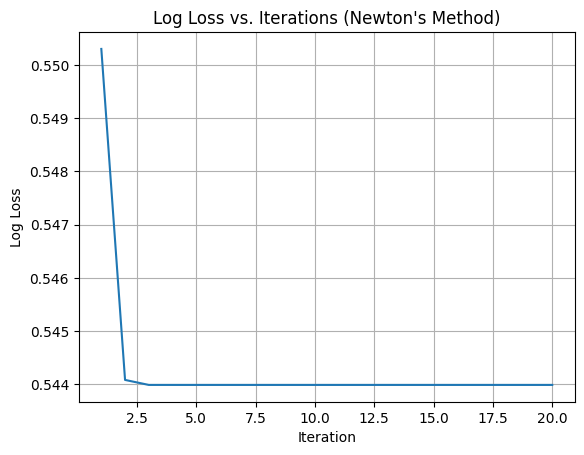

Final Weights: [-0.06465003 -0.03789831  0.30955881  0.22343734 -0.75605348  0.74645222]


In [ ]:
# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Compute the gradient of the log-likelihood
def compute_gradient(X, y, weights):
    predictions = sigmoid(np.dot(X, weights))
    gradient = np.dot(X.T, (predictions - y))
    return gradient

# Compute the Hessian matrix
def compute_hessian(X, weights):
    predictions = sigmoid(np.dot(X, weights))
    diag = np.diag(predictions * (1 - predictions))
    hessian = np.dot(np.dot(X.T, diag), X)
    return hessian

# Newton's method for logistic regression
def newtons_method(X, y, iterations=20):
    # Initialize weights
    weights = np.zeros(X.shape[1])
    losses = []

    for i in range(iterations):
        # Compute the gradient and Hessian
        gradient = compute_gradient(X, y, weights)
        hessian = compute_hessian(X, weights)

        # Update weights using Newton's method
        hessian_inv = np.linalg.inv(hessian)
        weights -= np.dot(hessian_inv, gradient)

        # Calculate log-loss (for tracking progress)
        predictions = sigmoid(np.dot(X, weights))
        loss = -np.mean(y * np.log(predictions) + (1 - y) * np.log(1 - predictions))
        losses.append(loss)

        print(f"Iteration {i+1}/{iterations}, Loss: {loss}")

    return weights, losses

# Load the Heart Disease dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
columns = ["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg",
           "thalach", "exang", "oldpeak", "slope", "ca", "thal", "target"]

df = pd.read_csv(url, header=None, names=columns)

# Replace missing values (represented by '?') with NaN and convert to numeric
df.replace('?', float('nan'), inplace=True)
df = df.apply(pd.to_numeric)

# Drop rows with missing values
df = df.dropna()

# Select features and target variable
X = df[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']]
y = df['target'].apply(lambda x: 1 if x > 0 else 0)

# Add intercept term (bias)
X = np.hstack([np.ones((X.shape[0], 1)), X])

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (excluding the bias term)
scaler = StandardScaler()
X_train[:, 1:] = scaler.fit_transform(X_train[:, 1:])
X_test[:, 1:] = scaler.transform(X_test[:, 1:])

# Apply Newton's method
weights, losses = newtons_method(X_train, y_train, iterations=20)

# Plot the loss over iterations
plt.plot(range(1, 21), losses)
plt.xlabel('Iteration')
plt.ylabel('Log Loss')
plt.title('Log Loss vs. Iterations (Newton\'s Method)')
plt.grid(True)
plt.show()

# Print final weights
print("Final Weights:", weights)

GD Losses: [0.6920874411529994, 0.6910367753062719, 0.6899951030084832, 0.6889623447737057, 0.6879384216441295, 0.6869232551926215, 0.6859167675250827, 0.6849188812826099, 0.6839295196434624, 0.6829486063248429, 0.6819760655844902, 0.6810118222220932, 0.68005580158053, 0.6791079295469308, 0.678168132553576, 0.6772363375786298, 0.6763124721467109, 0.6753964643293117, 0.6744882427450604, 0.6735877365598402]
SGD Losses: [0.5782381312842836, 0.5610290160450179, 0.550917767456209, 0.5484071137840777, 0.5472109028165333, 0.5478460041697297, 0.5495959746219242, 0.5452541792495987, 0.5460352777129689, 0.5452237092301826, 0.5461425683126861, 0.5452687204148651, 0.5449976356575232, 0.5465154448115045, 0.5446119967401475, 0.5452244690857053, 0.5467761874463266, 0.5485985599879236, 0.5463669314563107, 0.5490245610539328]
Newton Losses: [0.6920408481927386, 0.690943819332553, 0.6898559903074376, 0.6887772590626559, 0.6877075251283432, 0.6866466895879311, 0.6855946550473175, 0.6845513256047631, 0.68

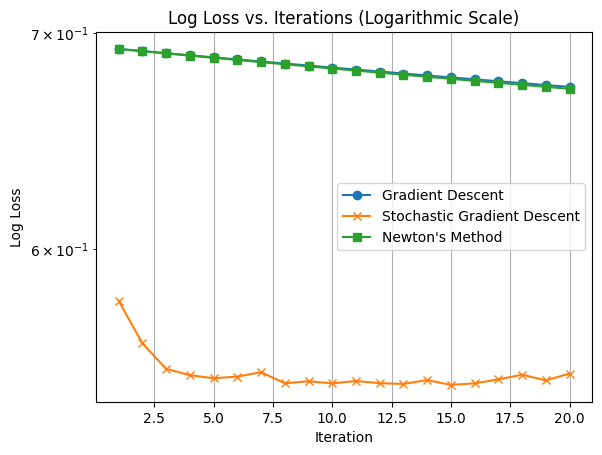

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import log_loss

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Compute gradient of the log-likelihood for GD and SGD
def compute_gradient(X, y, weights):
    predictions = sigmoid(np.dot(X, weights))
    gradient = np.dot(X.T, (predictions - y)) / len(y)
    return gradient

# Compute the Hessian matrix for Newton's method
def compute_hessian(X, weights):
    predictions = sigmoid(np.dot(X, weights))
    diag = np.diag(predictions * (1 - predictions))
    hessian = np.dot(np.dot(X.T, diag), X)
    return hessian

# Gradient Descent
def gradient_descent(X, y, lr=0.01, iterations=20):
    weights = np.zeros(X.shape[1])
    losses = []
    for i in range(iterations):
        gradient = compute_gradient(X, y, weights)
        weights -= lr * gradient
        predictions = sigmoid(np.dot(X, weights))
        loss = log_loss(y, predictions)
        losses.append(loss)
    return weights, losses

# Stochastic Gradient Descent
def stochastic_gradient_descent(X, y, lr=0.01, iterations=20):
    weights = np.zeros(X.shape[1])
    losses = []
    for i in range(iterations):
        for j in range(len(y)):
            random_index = np.random.randint(len(y))
            xi = X[random_index:random_index+1]
            yi = y[random_index:random_index+1]
            gradient = compute_gradient(xi, yi, weights)
            weights -= lr * gradient
        predictions = sigmoid(np.dot(X, weights))
        loss = log_loss(y, predictions)
        losses.append(loss)
    return weights, losses

# Newton's Method
def newtons_method(X, y, iterations=20):
    weights = np.zeros(X.shape[1])
    losses = []
    for i in range(iterations):
        gradient = compute_gradient(X, y, weights)
        hessian = compute_hessian(X, weights)
        hessian_inv = np.linalg.inv(hessian)
        weights -= np.dot(hessian_inv, gradient)
        predictions = sigmoid(np.dot(X, weights))
        loss = log_loss(y, predictions)
        losses.append(loss)
    return weights, losses

# Load the Heart Disease dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
columns = ["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg",
           "thalach", "exang", "oldpeak", "slope", "ca", "thal", "target"]

df = pd.read_csv(url, header=None, names=columns)

# Replace missing values (represented by '?') with NaN and convert to numeric
df.replace('?', float('nan'), inplace=True)
df = df.apply(pd.to_numeric)

# Drop rows with missing values
df = df.dropna()

# Select features and target variable
X = df[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']]
y = df['target'].apply(lambda x: 1 if x > 0 else 0)

# Add intercept term (bias)
X = np.hstack([np.ones((X.shape[0], 1)), X])

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (excluding the bias term)
scaler = StandardScaler()
X_train[:, 1:] = scaler.fit_transform(X_train[:, 1:])
X_test[:, 1:] = scaler.transform(X_test[:, 1:])

# Apply each method
_, gd_losses = gradient_descent(X_train, y_train, lr=0.01, iterations=20)
_, sgd_losses = stochastic_gradient_descent(X_train, y_train, lr=0.01, iterations=20)
_, newton_losses = newtons_method(X_train, y_train, iterations=20)

# Check the losses for debugging
print("GD Losses:", gd_losses)
print("SGD Losses:", sgd_losses)
print("Newton Losses:", newton_losses)

# Plot the loss for all methods using a logarithmic scale
plt.plot(range(1, 21), gd_losses, label='Gradient Descent', marker='o')
plt.plot(range(1, 21), sgd_losses, label='Stochastic Gradient Descent', marker='x')
plt.plot(range(1, 21), newton_losses, label="Newton's Method", marker='s')

plt.xlabel('Iteration')
plt.ylabel('Log Loss')
plt.yscale('log')  # Use logarithmic scale for the y-axis
plt.title('Log Loss vs. Iterations (Logarithmic Scale)')
plt.legend()
plt.grid(True)
plt.show()


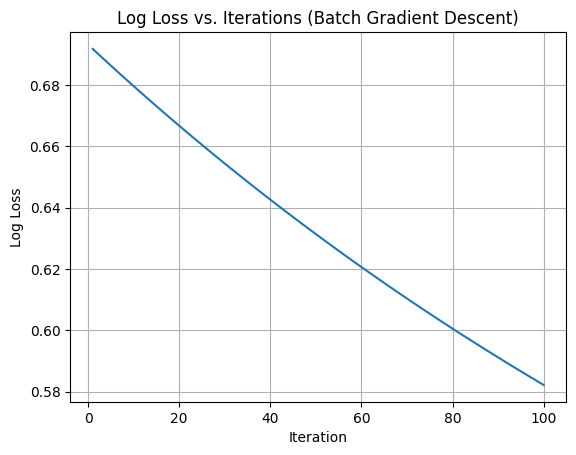

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Compute the gradient of the log-likelihood for gradient descent
def compute_gradient(X, y, weights):
    predictions = sigmoid(np.dot(X, weights))
    gradient = np.dot(X.T, (predictions - y)) / len(y)
    return gradient

# Batch Gradient Descent function
def gradient_descent(X, y, lr=0.01, iterations=100):
    weights = np.zeros(X.shape[1])
    losses = []

    for i in range(iterations):
        gradient = compute_gradient(X, y, weights)
        weights -= lr * gradient

        # Calculate the log loss (cost function)
        predictions = sigmoid(np.dot(X, weights))
        loss = -np.mean(y * np.log(predictions) + (1 - y) * np.log(1 - predictions))
        losses.append(loss)

    return weights, losses

# Generate synthetic data with new centers
np.random.seed(0)
centers = [[3, 0], [5, 1.5]]
X, y = make_blobs(n_samples=2000, centers=centers, random_state=5)

# Apply a transformation to the data
transformation = [[0.5, 0.5], [-0.5, 1.5]]
X = np.dot(X, transformation)

# Add intercept term (bias)
X = np.hstack([np.ones((X.shape[0], 1)), X])

# Convert target to binary (0, 1)
y = (y == 1).astype(int)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features (excluding the bias term)
scaler = StandardScaler()
X_train[:, 1:] = scaler.fit_transform(X_train[:, 1:])
X_test[:, 1:] = scaler.transform(X_test[:, 1:])

# Run Batch Gradient Descent
weights, losses = gradient_descent(X_train, y_train, lr=0.01, iterations=100)

# Plot the loss over iterations
plt.plot(range(1, 101), losses)
plt.xlabel('Iteration')
plt.ylabel('Log Loss')
plt.title('Log Loss vs. Iterations (Batch Gradient Descent)')
plt.grid(True)
plt.show()


# **Logistic regression First/Second-Order Methods**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs
# Generate synthetic data
np.random.seed(0)
centers = [[-5, 0], [5, 1.5]]
X, y = make_blobs(n_samples=2000, centers=centers, random_state=5)
transformation = [[0.5, 0.5], [-0.5, 1.5]]
X = np.dot(X, transformation)

In [18]:
# Add bias term to the feature set
X = np.c_[np.ones(X.shape[0]), X]  # Add a column of ones for the intercept

# Initialize weights randomly
weights = np.random.rand(X.shape[1])

# Set hyperparameters
learning_rate = 0.01
iterations = 20

# Batch Gradient Descent
for i in range(iterations):
    predictions = X.dot(weights)  # Calculate predictions
    error = predictions - y  # Calculate error
    gradient = X.T.dot(error) / X.shape[0]  # Compute gradient
    weights -= learning_rate * gradient  # Update weights
    cost = (error ** 2).mean()  # Calculate cost
    print(f"Iteration {i + 1}/{iterations}, Cost: {cost}")

print("Final weights:", weights)

Iteration 1/20, Cost: 188606.79719923774
Iteration 2/20, Cost: 210302202064.94754
Iteration 3/20, Cost: 2.3466960551531123e+17
Iteration 4/20, Cost: 2.61860445863925e+23
Iteration 5/20, Cost: 2.922018510158834e+29
Iteration 6/20, Cost: 3.2605887252432578e+35
Iteration 7/20, Cost: 3.638388599600471e+41
Iteration 8/20, Cost: 4.0599636192126795e+47
Iteration 9/20, Cost: 4.530385949192053e+53
Iteration 10/20, Cost: 5.055315459357963e+59
Iteration 11/20, Cost: 5.641067820762886e+65
Iteration 12/20, Cost: 6.294690492467896e+71
Iteration 13/20, Cost: 7.024047512800008e+77
Iteration 14/20, Cost: 7.837914115254434e+83
Iteration 15/20, Cost: 8.746082307409618e+89
Iteration 16/20, Cost: 9.759478683124151e+95
Iteration 17/20, Cost: 1.0890295885468836e+102
Iteration 18/20, Cost: 1.2152139302085586e+108
Iteration 19/20, Cost: 1.356019075793326e+114
Iteration 20/20, Cost: 1.513139117488398e+120
Final weights: [1.21804391e+58 6.66938766e+59 1.61237257e+60 3.09413183e+60
 1.83044452e+60]


In [ ]:
# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Loss function: Logistic Loss (Binary Cross-Entropy Loss)
# Loss function: Logistic Loss (Binary Cross-Entropy Loss)
def compute_loss(X, y, weights):
    m = len(y)
    h = sigmoid(np.dot(X, weights))
    loss = - (1/m) * (np.sum(y * np.log(h) + (1 - y) * np.log(1 - h)))
    return loss


# Stochastic Gradient Descent (SGD) Function
def stochastic_gradient_descent(X, y, weights, learning_rate, num_epochs):
    m = len(y)
    for epoch in range(num_epochs):
        for i in range(m):
            random_index = np.random.randint(m)  # Select a random training example
            X_i = X[random_index, :].reshape(1, X.shape[1])
            y_i = y[random_index].reshape(1, 1)
            prediction = sigmoid(np.dot(X_i, weights))
            gradient = np.dot(X_i.T, (prediction - y_i))  # Compute gradient for one example
            weights -= learning_rate * gradient  # Update weights
        # Optional: print the loss for monitoring convergence
        if epoch % 10 == 0:
            loss = compute_loss(X, y, weights)
            print(f'Epoch {epoch}, Loss: {loss}')
    return weights

# Set hyperparameters
learning_rate = 0.01
num_epochs = 20

# Train using Stochastic Gradient Descent (SGD)
weights_sgd = stochastic_gradient_descent(X_b, y, weights, learning_rate, num_epochs)

# Final weights after training
print("Final Weights (SGD):", weights_sgd)


Epoch 0, Loss: 0.0023506500294109846
Epoch 10, Loss: 0.0006729843474743423
Final Weights (SGD): [[ 0.05615159]
 [-0.57882686]
 [ 2.17965469]
 [ 1.63061743]]


In [ ]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Gradient of the loss function
def compute_gradient(X, y, weights):
    m = len(y)
    h = sigmoid(np.dot(X, weights))
    gradient = np.dot(X.T, (h - y)) / m
    return gradient

# Hessian matrix of the loss function
def compute_hessian(X, weights):
    m = len(y)
    h = sigmoid(np.dot(X, weights))
    # Diagonal matrix of probabilities
    diag = np.diag(h * (1 - h))
    # Compute Hessian: H = X^T * D * X
    hessian = np.dot(np.dot(X.T, diag), X) / m
    return hessian

# Loss function (cross-entropy)
def compute_loss(X, y, weights):
    m = len(y)
    h = sigmoid(np.dot(X, weights))
    loss = - (1/m) * (np.dot(y, np.log(h)) + np.dot((1 - y), np.log(1 - h)))
    return loss

# Newton's method to update weights
def newton_method(X, y, weights, iterations=20):
    for i in range(iterations):
        gradient = compute_gradient(X, y, weights)
        hessian = compute_hessian(X, weights)
        hessian_inv = np.linalg.inv(hessian)
        # Update weights using Newton-Raphson method
        weights -= np.dot(hessian_inv, gradient)
        # Optionally, print loss at each iteration to track progress
        loss = compute_loss(X, y, weights)
        print(f"Iteration {i+1}: Loss = {loss}")
    return weights

# Create synthetic data (make_blobs)
centers = [[-5, 0], [5, 1.5]]
X, y = make_blobs(n_samples=2000, centers=centers, random_state=5)

# Add bias term (intercept) to X (optional)
X = np.hstack((np.ones((X.shape[0], 1)), X))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize weights (zeros or small random values)
weights = np.zeros(X_train.shape[1])

# Run Newton's method for 20 iterations
weights = newton_method(X_train, y_train, weights, iterations=20)

# Predict function
def predict(X, weights):
    return sigmoid(np.dot(X, weights)) >= 0.5

# Evaluate the model
y_pred = predict(X_test, weights)
accuracy = np.mean(y_pred == y_test)
print("Accuracy:", accuracy)


Iteration 1: Loss = 0.09596811510621038
Iteration 2: Loss = 0.02832065068449717
Iteration 3: Loss = 0.008867792847020346
Iteration 4: Loss = 0.002863401570086005
Iteration 5: Loss = 0.0009515420090441046
Iteration 6: Loss = 0.0003255299768944314
Iteration 7: Loss = 0.00011343960151390165
Iteration 8: Loss = 3.922555869562709e-05
Iteration 9: Loss = 1.3081030940458067e-05
Iteration 10: Loss = 4.161697907423904e-06
Iteration 11: Loss = nan
Iteration 12: Loss = nan


<ipython-input-8-a167011474b3>:30: RuntimeWarning: divide by zero encountered in log
  loss = - (1/m) * (np.dot(y, np.log(h)) + np.dot((1 - y), np.log(1 - h)))


Iteration 13: Loss = nan
Iteration 14: Loss = nan
Iteration 15: Loss = nan
Iteration 16: Loss = nan
Iteration 17: Loss = nan
Iteration 18: Loss = nan
Iteration 19: Loss = nan
Iteration 20: Loss = nan
Accuracy: 1.0


Iteration 1: Loss = 0.09596811510621038
Iteration 2: Loss = 0.02832065068449717
Iteration 3: Loss = 0.008867792847020346
Iteration 4: Loss = 0.002863401570086005
Iteration 5: Loss = 0.0009515420090441046
Iteration 6: Loss = 0.0003255299768944314
Iteration 7: Loss = 0.00011343960151390165
Iteration 8: Loss = 3.922555869562709e-05
Iteration 9: Loss = 1.3081030940458067e-05
Iteration 10: Loss = 4.161697907423904e-06
Iteration 11: Loss = nan
Iteration 12: Loss = nan
Iteration 13: Loss = nan
Iteration 14: Loss = nan


<ipython-input-11-19e73c0bccc9>:29: RuntimeWarning: divide by zero encountered in log
  loss = - (1/m) * (np.dot(y, np.log(h)) + np.dot((1 - y), np.log(1 - h)))


Iteration 15: Loss = nan
Iteration 16: Loss = nan
Iteration 17: Loss = nan
Iteration 18: Loss = nan
Iteration 19: Loss = nan
Iteration 20: Loss = nan


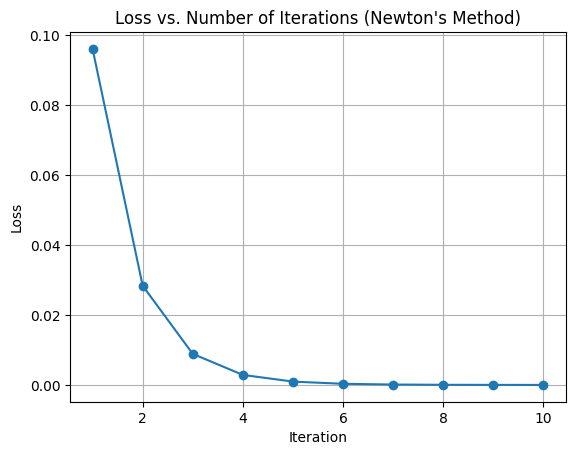

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Gradient of the loss function
def compute_gradient(X, y, weights):
    m = len(y)
    h = sigmoid(np.dot(X, weights))
    gradient = np.dot(X.T, (h - y)) / m
    return gradient

# Hessian matrix of the loss function
def compute_hessian(X, weights):
    m = len(y)
    h = sigmoid(np.dot(X, weights))
    diag = np.diag(h * (1 - h))
    hessian = np.dot(np.dot(X.T, diag), X) / m
    return hessian

# Loss function (cross-entropy)
def compute_loss(X, y, weights):
    m = len(y)
    h = sigmoid(np.dot(X, weights))
    loss = - (1/m) * (np.dot(y, np.log(h)) + np.dot((1 - y), np.log(1 - h)))
    return loss

# Newton's method to update weights
def newton_method(X, y, weights, iterations=20):
    losses = []  # Store losses for plotting
    for i in range(iterations):
        gradient = compute_gradient(X, y, weights)
        hessian = compute_hessian(X, weights)
        hessian_inv = np.linalg.inv(hessian)
        # Update weights using Newton-Raphson method
        weights -= np.dot(hessian_inv, gradient)
        # Compute and store the loss
        loss = compute_loss(X, y, weights)
        losses.append(loss)
        print(f"Iteration {i+1}: Loss = {loss}")
    return weights, losses

# Create synthetic data (make_blobs)
centers = [[-5, 0], [5, 1.5]]
X, y = make_blobs(n_samples=2000, centers=centers, random_state=5)

# Add bias term (intercept) to X (optional)
X = np.hstack((np.ones((X.shape[0], 1)), X))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize weights (zeros or small random values)
weights = np.zeros(X_train.shape[1])

# Run Newton's method for 20 iterations
weights, losses = newton_method(X_train, y_train, weights, iterations=20)

# Plot the loss over iterations
plt.plot(range(1, 21), losses, marker='o')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss vs. Number of Iterations (Newton\'s Method)')
plt.grid(True)
plt.show()


<ipython-input-12-4bca24e8102c>:14: RuntimeWarning: divide by zero encountered in log
  loss = - (1/m) * (np.dot(y, np.log(h)) + np.dot((1 - y), np.log(1 - h)))


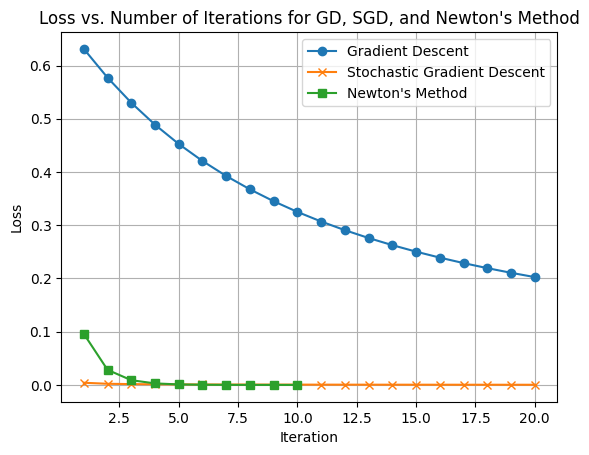

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Cross-entropy loss function
def compute_loss(X, y, weights):
    m = len(y)
    h = sigmoid(np.dot(X, weights))
    loss = - (1/m) * (np.dot(y, np.log(h)) + np.dot((1 - y), np.log(1 - h)))
    return loss

# Gradient of the loss function
def compute_gradient(X, y, weights):
    m = len(y)
    h = sigmoid(np.dot(X, weights))
    gradient = np.dot(X.T, (h - y)) / m
    return gradient

# Hessian matrix of the loss function
def compute_hessian(X, weights):
    m = len(y)
    h = sigmoid(np.dot(X, weights))
    diag = np.diag(h * (1 - h))
    hessian = np.dot(np.dot(X.T, diag), X) / m
    return hessian

# Gradient Descent
def gradient_descent(X, y, weights, alpha=0.01, iterations=20):
    losses = []
    for i in range(iterations):
        gradient = compute_gradient(X, y, weights)
        weights -= alpha * gradient
        loss = compute_loss(X, y, weights)
        losses.append(loss)
    return weights, losses

# Stochastic Gradient Descent (SGD)
def stochastic_gradient_descent(X, y, weights, alpha=0.01, iterations=20):
    losses = []
    for i in range(iterations):
        for j in range(len(y)):  # Loop over each training example
            rand_index = np.random.randint(0, len(y))
            X_sample = X[rand_index:rand_index+1]
            y_sample = y[rand_index:rand_index+1]
            gradient = compute_gradient(X_sample, y_sample, weights)
            weights -= alpha * gradient
        loss = compute_loss(X, y, weights)
        losses.append(loss)
    return weights, losses

# Newton's Method
def newton_method(X, y, weights, iterations=20):
    losses = []
    for i in range(iterations):
        gradient = compute_gradient(X, y, weights)
        hessian = compute_hessian(X, weights)
        hessian_inv = np.linalg.inv(hessian)
        weights -= np.dot(hessian_inv, gradient)
        loss = compute_loss(X, y, weights)
        losses.append(loss)
    return weights, losses

# Create synthetic data
centers = [[-5, 0], [5, 1.5]]
X, y = make_blobs(n_samples=2000, centers=centers, random_state=5)

# Add bias term (intercept) to X
X = np.hstack((np.ones((X.shape[0], 1)), X))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize weights
weights_initial = np.zeros(X_train.shape[1])

# Run Gradient Descent
_, losses_gd = gradient_descent(X_train, y_train, weights_initial.copy(), alpha=0.01, iterations=20)

# Run Stochastic Gradient Descent
_, losses_sgd = stochastic_gradient_descent(X_train, y_train, weights_initial.copy(), alpha=0.01, iterations=20)

# Run Newton's Method
_, losses_newton = newton_method(X_train, y_train, weights_initial.copy(), iterations=20)

# Plot all loss curves
plt.plot(range(1, 21), losses_gd, label='Gradient Descent', marker='o')
plt.plot(range(1, 21), losses_sgd, label='Stochastic Gradient Descent', marker='x')
plt.plot(range(1, 21), losses_newton, label="Newton's Method", marker='s')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss vs. Number of Iterations for GD, SGD, and Newton\'s Method')
plt.legend()
plt.grid(True)
plt.show()
